### Job Hunting 2025

Following my job hunting process, analyzing the job ads and current status of my job applications. 
<br>I am applying for positions in 4 main fields:
<br>&nbsp;&nbsp;&nbsp; - data (looking for junior positions, eager to work with SQL and Python, have completed 72 hours worth of courses and actively learning and practicing),
<br>&nbsp;&nbsp;&nbsp; - localization (looking for localization PM positions, have 3 years of experience in the localization industry and a degree in Chinese Studies),
<br>&nbsp;&nbsp;&nbsp; - gaming (mainly applying for localization or PM positions within the gaming industry),
<br>&nbsp;&nbsp;&nbsp; - PM (2+ years of experience as a project manager).
<br>
<br>Notes:
<br>&nbsp;&nbsp;&nbsp; - data is pulled from 'Applications_GitHub.xlsx'
<br>&nbsp;&nbsp;&nbsp; - data in the .xlsx which I am sharing on GitHub is incomplete for privacy purposes – company names, direct links for job ads and some other data I'm collecting have been removed
<br>&nbsp;&nbsp;&nbsp; - libraries used: pandas, matplotlib.pyplot, seaborn
<br>&nbsp;&nbsp;&nbsp; - colors for plots: https://matplotlib.org/3.3.0/gallery/color/named_colors.html

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

applications = pd.read_excel("Applications_GitHub.xlsx")
# print(applications.info())

display(applications['Field'].unique())
display(applications.head())

array(['Data', 'Gaming', 'Localization', 'PM'], dtype=object)

,Field,Position,CV,Cover_Letter,Project,Test,Python,SQL,PBI or similar,MS Excel,Date_Applied,Pre-Screen,Interview,Offer,Rejection,Ghosted after contact,No reply,link
0,Data,Datový analytik – junior,Y,Y,NaN,NaN,Y,Y,Y,Y,2025-07-04,NaT,NaT,NaN,NaT,NaN,NaN,jobs.cz/
1,Data,Data analytik / analytička,Y,Y,NaN,NaN,Y,Y,Y,Y,2025-07-04,NaT,NaT,NaN,NaT,NaN,NaN,jobs.cz/
2,Data,Junior konzultant - Datová analytika,Y,Y,NaN,Y,Y,Y,Y,NaN,2025-06-26,NaT,NaT,NaN,NaT,NaN,NaN,jobs.cz/
3,Data,Začínající Datový Analytik,Y,Y,NaN,Y,Y,Y,Y,Y,2025-06-20,NaT,NaT,NaN,NaT,NaN,NaN,jobs.cz/
4,Data,Junior Business & Data Analyst,Y,Y,NaN,NaN,NaN,Y,NaN,Y,2025-06-12,NaT,NaT,NaN,2025-06-30,NaN,NaN,https://www.linkedin.com/


In [101]:
# cleaning
# remove spaces, set column names to uppercase for easier handling
applications.columns = applications.columns.str.replace(" ", "_").str.upper()
# drop rows where an application hasn't actually been submitted
applications = applications.dropna(subset=['DATE_APPLIED'])
# filter for year 2025 only
applications = applications[applications['DATE_APPLIED'].dt.year == 2025]
applications.head()

,FIELD,POSITION,CV,COVER_LETTER,PROJECT,TEST,PYTHON,SQL,PBI_OR_SIMILAR,MS_EXCEL,DATE_APPLIED,PRE-SCREEN,INTERVIEW,OFFER,REJECTION,GHOSTED_AFTER_CONTACT,NO_REPLY,LINK
0,Data,Datový analytik – junior,Y,Y,NaN,NaN,Y,Y,Y,Y,2025-07-04,NaT,NaT,NaN,NaT,NaN,NaN,jobs.cz/
1,Data,Data analytik / analytička,Y,Y,NaN,NaN,Y,Y,Y,Y,2025-07-04,NaT,NaT,NaN,NaT,NaN,NaN,jobs.cz/
2,Data,Junior konzultant - Datová analytika,Y,Y,NaN,Y,Y,Y,Y,NaN,2025-06-26,NaT,NaT,NaN,NaT,NaN,NaN,jobs.cz/
3,Data,Začínající Datový Analytik,Y,Y,NaN,Y,Y,Y,Y,Y,2025-06-20,NaT,NaT,NaN,NaT,NaN,NaN,jobs.cz/
4,Data,Junior Business & Data Analyst,Y,Y,NaN,NaN,NaN,Y,NaN,Y,2025-06-12,NaT,NaT,NaN,2025-06-30,NaN,NaN,https://www.linkedin.com/


Overall Summary

In [102]:
# prepare overall summary of application status/outcome
print("Application Status Summary")
app_summary = pd.DataFrame({
    "Metric": [
        "Number of Applications",
        "Number of Initial Reply Pending",
        "Number of Pre-Screen Calls",
        "Rejections Post-Pre-Screen",
        "Number of Interviews",
        "Number of Rejections Post-Interview",
        "Number of Reply Post-Interview Pending",
        "Total Rejections",
        "Ghosted",
        "Ghosted after contact"
    ],
    "Value": [
        applications['FIELD'].count(),
        len(applications[(applications[["INTERVIEW", "PRE-SCREEN", "REJECTION", "NO_REPLY"]].isna().all(axis=1))]), # check where all listed columns are null
        len(applications[(applications['PRE-SCREEN'].notna())]),
        len(applications[(applications[['PRE-SCREEN', "REJECTION"]].notna().all(axis=1))]),
        len(applications[(applications['INTERVIEW'].notna())]),
        len(applications[(applications[["INTERVIEW", "REJECTION"]].notna().all(axis=1))]), # check where both interview and rejection are not null
        len(applications[(applications["INTERVIEW"].notna()) & (applications['REJECTION'].isna())]), # check where interview is not null and rejection is null
        len(applications[(applications['REJECTION'].notna())]),
        len(applications[(applications['NO_REPLY'].notna())]),
        len(applications[(applications['GHOSTED_AFTER_CONTACT'].notna())])
        ]
})

app_summary["Value"] = app_summary['Value'].round().astype(int)
display(app_summary)


Application Status Summary


,Metric,Value
0,Number of Applications,33
1,Number of Initial Reply Pending,4
2,Number of Pre-Screen Calls,6
3,Rejections Post-Pre-Screen,3
4,Number of Interviews,3
5,Number of Rejections Post-Interview,2
6,Number of Reply Post-Interview Pending,1
7,Total Rejections,18
8,Ghosted,10
9,Ghosted after contact,1


Vizualization 1: Job applications by field


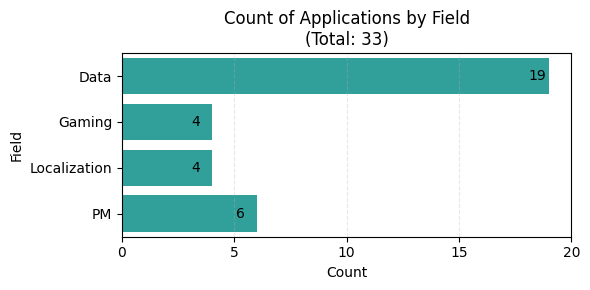

In [103]:
# new series to be plotted
field = applications['FIELD']

plt.figure(figsize=(6, 3))
ax = sns.countplot(field, color='lightseagreen')

ax.set(xlabel="Count", ylabel="Field", title=f"Count of Applications by Field\n(Total: {applications['FIELD'].count()})")
ax.bar_label(ax.containers[0], padding=-15)
plt.xticks(range(0, 25, 5))

plt.grid(axis='x', linestyle="--", alpha=0.3)
plt.tight_layout()
plt.savefig('jobs_field.png')
plt.show()

Visualization 2: Applications by month

<Figure size 640x480 with 0 Axes>

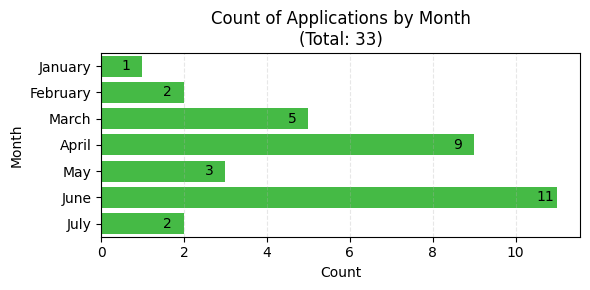

In [104]:
# new series 'month', extracting the month from the date values from 'DATE_APPLIED' column from original df
month = pd.to_datetime(applications['DATE_APPLIED']).dt.month_name()
# display(month.value_counts())

# list of months in calendar order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
# filter for months present in the series
present_months = month.unique()
# filter the list to only include months in present_months, use the filtered list in the plot
months_order_filtered = [m for m in months_order if m in present_months]

plt.clf()
plt.figure(figsize=(6, 3))
ax = sns.countplot(y=month, color='limegreen', order=months_order_filtered)

ax.set(xlabel='Count', ylabel='Month', title=f'Count of Applications by Month\n(Total: {month.count()})')
ax.bar_label(ax.containers[0], padding=-15)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('jobs_months.png')
plt.show()

Visualization 3: Application Status

<Figure size 640x480 with 0 Axes>

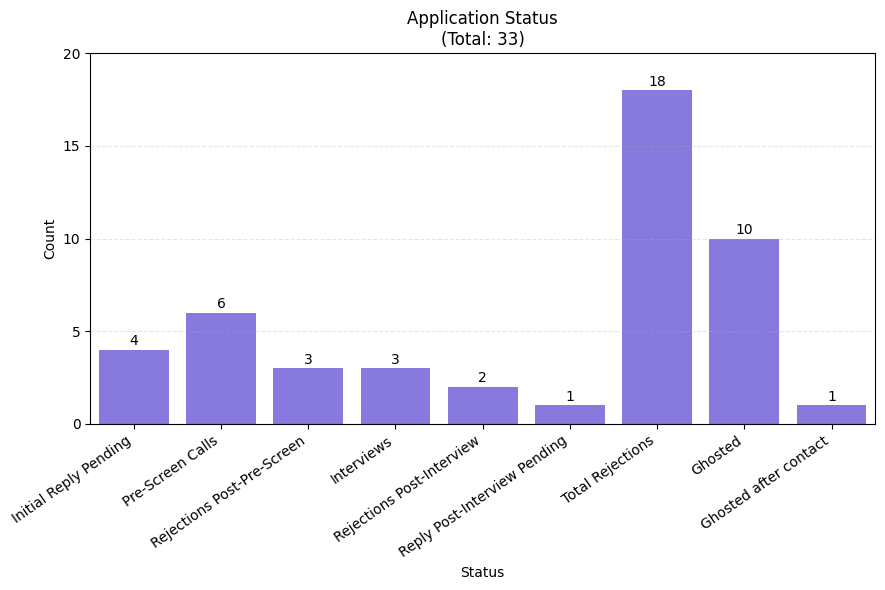

In [105]:
# prepare data to be plotted
app_summary_plot = app_summary.drop(index=app_summary.index[[0]]).copy() # drop the first column which is just the number of applications
# Shorten labels
app_summary_plot["Metric"] = app_summary_plot["Metric"].str.replace("Number of ", "")
# Group and reset index
app_summary_plot = app_summary_plot.groupby('Metric', sort=False)["Value"].sum().reset_index()
# display(app_summary_plot)

plt.clf()
plt.figure(figsize=(9, 6))
ax = sns.barplot(data=app_summary_plot, x="Metric", y="Value", color="mediumslateblue")

ax.set(xlabel="Status", ylabel="Count", title=f"Application Status\n(Total: {applications['FIELD'].count()})")
ax.bar_label(ax.containers[0], padding=1)
plt.xticks(rotation=35, ha="right")
plt.yticks(range(0, 25, 5))

plt.grid(axis='y', linestyle="--", alpha=0.3)
plt.tight_layout()
plt.savefig('jobs_status.png')
plt.show()

Visualization 4: Materials provided with application

<Figure size 640x480 with 0 Axes>

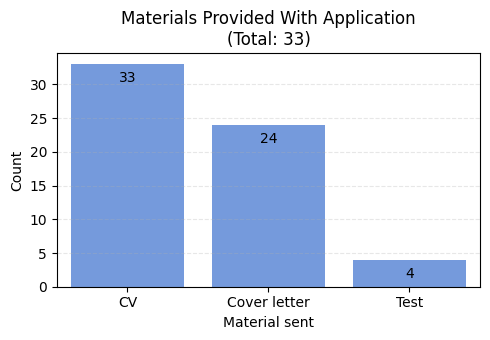

In [106]:
materials = pd.DataFrame({
    'Material sent': [
        'CV',
        'Cover letter',
        'Test'
    ],
    'Count': [
        len(applications[(applications['CV'].notna())]),
        len(applications[(applications['COVER_LETTER'].notna())]),
        len(applications[(applications['TEST'].notna())])
    ]
})
# display(materials)

plt.clf()
plt.figure(figsize=(5, 3.5))
ax = sns.barplot(data=materials, x="Material sent", y="Count", color="cornflowerblue")

ax.set(xlabel="Material sent", ylabel="Count", title=f"Materials Provided With Application\n(Total: {applications['FIELD'].count()})")
ax.bar_label(ax.containers[0], padding=-15)

plt.grid(axis='y', linestyle="--", alpha=0.3)
plt.tight_layout()
plt.savefig('jobs_mats.png')
plt.show()

Visualization 5: Job advertisement source

<Figure size 640x480 with 0 Axes>

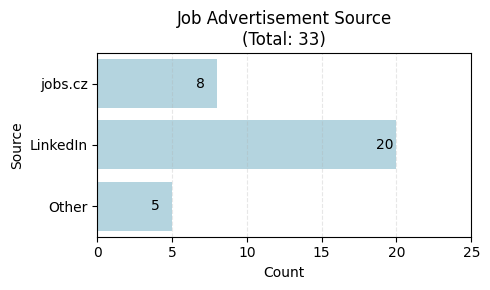

In [107]:
# prepare data to be plotted
source = applications['LINK'] # create a new series 'source', which is the 'LINK' column from original df
# display(source.head())

source = source.fillna('Other') # fill null rows with 'Other'
source[source.str.contains('linkedin', na=False)] = 'LinkedIn'
source[source.str.contains('jobs.cz', na=False)] = 'jobs.cz'
# display(source.value_counts()) # check counts in the series

plt.clf()
plt.figure(figsize=(5,3))
ax = sns.countplot(source, color='lightblue')
ax.set(xlabel="Count", ylabel="Source", title=f"Job Advertisement Source\n(Total: {applications['FIELD'].count()})")
ax.bar_label(ax.containers[0], padding=-15)
ax.set_xticks(range(0, 30, 5))

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('jobs_source.png')
plt.show()